# Assignment 3: Recommender Systems

We use the well-known MovieLens dataset (in this case the small version). You may find the following useful to obtain the data from the GroupLens repository, and to read it into a dataframe.

In [1]:
import os, requests
import numpy as np

#mlSize = "ml-1m"
#mlSize = "ml-100k"
mlSize = "ml-latest-small"
zipUrl = 'http://files.grouplens.org/datasets/movielens/'+mlSize+'.zip'
zipFile = 'data/'+mlSize+'.zip'
dataFile = zipFile
url = zipUrl
dataDir = 'data'
if not os.path.exists(dataDir):
    os.makedirs(dataDir)
if not os.path.isfile(zipFile):
    r = requests.get(zipUrl)
    with open(zipFile, 'wb') as f:
        f.write(r.content)

# Need to unzip the file to read its contents
import zipfile
with zipfile.ZipFile(zipFile,"r") as zip_ref:
    zip_ref.extractall(dataDir)

In [2]:
# Read the ratings data into a dataframe
import pandas as pd
fn = 'ratings.csv'
colNames = ['UserID','MovieID','Rating','Timestamp']
ratingsDf = pd.read_csv('data/'+mlSize+'/'+fn, names=colNames, skiprows=1, sep=',', engine='python')
ratingsDf.head()

,UserID,MovieID,Rating,Timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
# Timestamps are difficult for humans to read, so convert them into a more readable format
import time
ts = time.gmtime()
print("Timestamp now is {} which is {}".format(str(ts),time.strftime("%Y-%m-%d %H:%M:%S", ts)))

Timestamp now is time.struct_time(tm_year=2021, tm_mon=5, tm_mday=12, tm_hour=11, tm_min=17, tm_sec=5, tm_wday=2, tm_yday=132, tm_isdst=0) which is 2021-05-12 11:17:05


In [4]:
ratingsDf['DateTime'] = pd.to_datetime(ratingsDf['Timestamp'],unit='s')
ratingsDf.drop(columns=['Timestamp'], inplace=True)
ratingsDf.head()

,UserID,MovieID,Rating,DateTime
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


__Task 2.1__: Based on the code above, read the `movies.csv` data files into data frames. In the past,
GroupLens also included user data. Comment on why that is no longer the case and what this means for
recommendation algorithms.


In [5]:
## BEGIN YOUR ANSWER HERE

In [6]:
# Read the movies data into a dataframe
import pandas as pd
fn = 'movies.csv'
colNames = ['MovieID', 'Title', 'Genres']
moviesDf = pd.read_csv('data/'+mlSize+'/'+fn, names=colNames, skiprows=1, sep=',', engine='python')
moviesDf.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


**Comments**

The following excerpts from the README.txt file that comes with the data package show that anonymizing the user data was a deliberate policy. Only a user-id is used, with no demographic details.

* *MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between `ratings.csv` and `tags.csv` (i.e., the same id refers to the same user across the two files).*
* *These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.*
* *Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.*

Every day, vast quantities of data are exchanged, processed, and collected around the world in the digital age of a global knowledge economy. Many of these activities have been made possible by significant technical advances in computing and networking technologies in recent years.  Although many countries around the world agree on the importance of individual privacy, privacy interpretations and law applicability differ. Some countries view and preserve privacy as a fundamental right, while others provide privacy protection as part of other constitutional doctrines. Even so, some countries have yet to enact any privacy safeguards.  With the popular example of the target recommender guessing that a teenage girl was pregnant, recommendation systems will make inferences based on past behaviour. Users' privacy will be jeopardized as a result of this. To comply with legal obligations or to address ethical concerns about privacy security, MovieLens has anonymized the data.

The type of data in the dataset is an important factor when considering a recommender system to use. The majority of our data is based on ratings, tags and movies. We have no user information.  As a result, the algorithm we can use with this dataset is limited. Collaborative filtering between users recommends products that are common among similar customers. Since we don't have user registration details, social relationships between users, or backgrounds like their location or language, this won't work for this anonymized data collection. Item-item collaborative filtering, on the other hand, may be able to provide valuable suggestions. In this category of algorithms, Slope One is a viable option. Content-based filtering strategies can be effective because they are based on content.  Content-based filtering matches up items based on their attributes to a customer’s preferences which we do have in terms of the ratings and the sentiment contained in the tags.  We can use information from the IMDB and TMDB online data sources, which is referenced per movie in the links table, so as to complement the movie metadata to make the item detail richer. Given a high affinity of the items, ARM techniques are the most likely to be good techniques for the dataset as well. Algorithms based on NMF are now emerging that will make recommendations while maintaining user privacy so the user privacy concerns could be addressed going forward.

I believe the argument is that, despite the lack of detailed user knowledge, we are not entirely constrained in our ability to use the recommendation engines on this data set, and some thought should be given to how to overcome the lack of user data within the context of the desired objectives.

In [7]:
## END YOUR ANSWER HERE

The following code can be used to filter the number of Movies. Choosing a large threshold (like 200) ensures that only "blockbuster" movies with that number of aggregate ratings will be considered. This is convenient (much reduced runtimes!) when developing your solution, but a less stringent threshold should be used for the result you hand in (100 is required).

In [8]:
#minMovieRatings = 200
minMovieRatings = 100
filterMovies = ratingsDf['MovieID'].value_counts() > minMovieRatings
filterMovies = filterMovies[filterMovies].index.tolist()
print('Filtered ratings - omitting movies with less than {} ratings results in {} ratings'.format(minMovieRatings, len(filterMovies)))

Filtered ratings - omitting movies with less than 100 ratings results in 134 ratings


 __Task 2.2__
<br /> a) You should apply a similar filter to the Users, selecting only those who rated at least 80 movies.
<br /> b) You should then apply `filterUsers` and `filterMovies` filters to the ratings dataframe, you might find the `isin(filteredSet)` function useful.
<br /> c) You are given some code below to help you visualise the distribution of counts of ratings by user. Hence or otherwise comment on the similarities and differences between the distributions of ratings by user and of ratings by Movie.

In [9]:
## BEGIN YOUR ANSWER HERE

In [10]:
#2.2.a)

minUserRatings = 80
filterUsers = ratingsDf['UserID'].value_counts() > minUserRatings
filterUsers = filterUsers[filterUsers].index.tolist()
print('Filtered ratings - omitting users with less than {} ratings results in {} ratings'.format(minUserRatings, len(filterUsers)))

Filtered ratings - omitting users with less than 80 ratings results in 285 ratings


**Comments**

I am curious to know how many Users and Movies sit in an intersection of these two sets.  ![intersection diagram](./img/intersection.png "Set intersection")

In [11]:
filterUsersSet = set(filterUsers)
filterMoviesSet = set(filterMovies)
intersection = set.intersection(filterUsersSet, filterMoviesSet)
len(intersection)

# Number of users and movies in the intersection
# Must be absolute block busters!? Or maybe the worst as well?

30

In [12]:
movieSide = moviesDf[moviesDf['MovieID'].isin(intersection)][["Title", "MovieID"]]
movieSide.set_index(["MovieID"], inplace = True, drop = True)

ratingsSide = ratingsDf[ratingsDf['MovieID'].isin(intersection)].groupby('MovieID')[["Rating", "MovieID"]].mean()
ratingsSide.set_index(["MovieID"], inplace = True, drop = True)

Top30 = movieSide.merge(ratingsSide, left_index=True, right_index=True)
Top30.sort_values(by=['Rating'], ascending=False)

,Title,Rating
MovieID,,
318,"Shawshank Redemption, The (1994)",4.429022
50,"Usual Suspects, The (1995)",4.237745
260,Star Wars: Episode IV - A New Hope (1977),4.231076
527,Schindler's List (1993),4.225000
356,Forrest Gump (1994),4.164134
593,"Silence of the Lambs, The (1991)",4.161290
608,Fargo (1996),4.116022
111,Taxi Driver (1976),4.105769
541,Blade Runner (1982),4.100806


It's worth noting that these aren't really "high-ranking" films, as I had assumed; instead, they're "classic" and watched by a wide variety of users.

In [13]:
# Get some perspective...

# Number of users
print(ratingsDf['UserID'].nunique())

# Number of movies
print(ratingsDf['MovieID'].nunique())

610
9724


Surprisingly, the intersection of movies and user feedback above the threshold just makes up a small portion of the initial dataset. I also find it surprising that only 1.3 percent of movies meet our minimum threshold, even though nearly half of all users (46.7 percent) meet that minimum threshold.

This tells me the user base generally is quite active in terms of reviewing movies. The reviewers seldom over review a particular movie and the reviews are diverse else there would be more in the intersection.

I think this diversity is valuable information for the recommender system as it helps to mitigate too much similarity between the users.  From my analysis and interpretation, these ratings represent a diverse range of opinions. As a consequence, I imagine that if the movie metadata is improved by providing information such as awards-won, director, producer, actors, year of release, and so on, a recommendation engine will infer good recommendations to users based on item-item (content-based) filtering based of these existing ratings.

In [14]:
## END YOUR ANSWER HERE

#### User Count Dataframe

Using the filtered ratings dataframe, count the ratings per User and plot this data in a histogram. 

In [15]:
# 2.2.b

filter_Ratings_by_User_Df = ratingsDf[ratingsDf['UserID'].isin(filterUsers)]
filter_Ratings_by_User_Df.shape

# Renaming Df too make more explicit for program control (less confusing)...

(87622, 4)

In [16]:
# Get the filter_Ratings_by_User_Df groupby object
userRatedCounts = filter_Ratings_by_User_Df.groupby(['UserID'])[['Rating']].count().sort_values('Rating', ascending=False)
userRatedCounts.columns = ['Count_of_Ratings']
userRatedCounts.describe()

,Count_of_Ratings
count,285.000000
mean,307.445614
std,342.576363
min,81.000000
25%,119.000000
50%,186.000000
75%,363.000000
max,2698.000000


In [17]:
# Compute summaries of the userRatedCounts object
medianNumRatingsPerUser = userRatedCounts.median()['Count_of_Ratings']
minNumRatingsPerUser = userRatedCounts.min()['Count_of_Ratings']
maxNumRatingsPerUser = userRatedCounts.max()['Count_of_Ratings']
numUniqueFilteredUsers = filter_Ratings_by_User_Df['UserID'].nunique() 
print("There are {} users who rated movies (above the min threshold), with the median and maximum number of movies rated by these users being {} and {}".format(numUniqueFilteredUsers,medianNumRatingsPerUser,maxNumRatingsPerUser))
print("Note: These are stats about the most active reviewers on the platform, i.e. those who reviewed at least {} movies.".format(minUserRatings))

There are 285 users who rated movies (above the min threshold), with the median and maximum number of movies rated by these users being 186.0 and 2698
Note: These are stats about the most active reviewers on the platform, i.e. those who reviewed at least 80 movies.


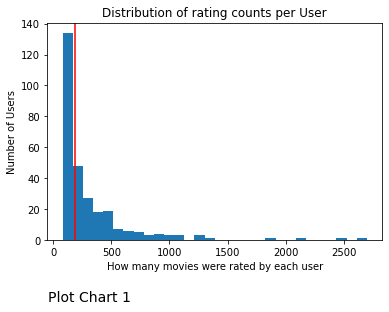

In [18]:
# Plot the (plain) distribution of rating counts by user
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
rangeUserRatings = np.arange(minNumRatingsPerUser-1,maxNumRatingsPerUser)
plt.hist(userRatedCounts['Count_of_Ratings'], bins=30)
xlabel = 'How many movies were rated by each user'
ylabel = 'Number of Users'
title = 'Distribution of rating counts per User'
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.axvline(x=medianNumRatingsPerUser, color='r')
plt.title(title)
plt.text(-40, -40, "Plot Chart 1", fontsize=14)  # For in-text referencing
plt.show()

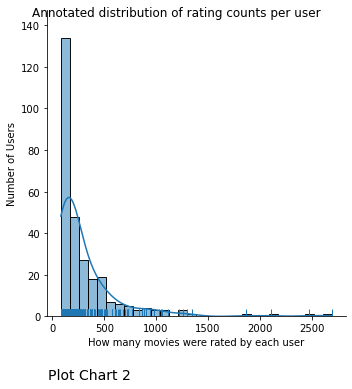

In [19]:
# Plot the annotated distribution of rating counts per user
import seaborn as sns
g = sns.displot(data=userRatedCounts['Count_of_Ratings'], bins=30, kde=True, rug=True)
xlabel = 'How many movies were rated by each user'
ylabel = 'Number of Users'
title = "Annotated distribution of rating counts per user"
g.set_axis_labels(xlabel,ylabel)
g.fig.suptitle(title)
plt.text(-40, -30, "Plot Chart 2", fontsize=14)  # For in-text referencing
plt.show()

#### Movie Count Dataframe

Using the filtered ratings dataframe, count the ratings per movie and plot this data in a histogram.

In [20]:
# 2.2.b cont.

filter_Ratings_by_Movie_Df = ratingsDf[ratingsDf['MovieID'].isin(filterMovies)]
filter_Ratings_by_Movie_Df.shape

(19788, 4)

In [21]:
# Get the movieRated groupby object
movieRatedCounts = filter_Ratings_by_Movie_Df.groupby(['MovieID'])[['Rating']].count().sort_values('Rating', ascending=False)
movieRatedCounts.columns = ['Count_of_Ratings']
movieRatedCounts.describe()

,Count_of_Ratings
count,134.000000
mean,147.671642
std,47.349886
min,101.000000
25%,112.000000
50%,132.000000
75%,171.000000
max,329.000000


In [22]:
# Compute summaries of the userRated object
medianNumRatingsPerMovie = movieRatedCounts.median()['Count_of_Ratings']
minNumRatingsPerMovie = movieRatedCounts.min()['Count_of_Ratings']
maxNumRatingsPerMovie = movieRatedCounts.max()['Count_of_Ratings']
numUniqueFilteredMovies = filter_Ratings_by_Movie_Df['MovieID'].nunique() 
print("There are {} movies rated by users (above the min threshold), with the median and maximum number of ratings per movie being {} and {} respectively.".format(numUniqueFilteredMovies,medianNumRatingsPerMovie,maxNumRatingsPerMovie))
print("Note: These are stats about the most reviewed movies on the platform, i.e. those movies having received at least {} reviews.".format(minMovieRatings))

There are 134 movies rated by users (above the min threshold), with the median and maximum number of ratings per movie being 132.0 and 329 respectively.
Note: These are stats about the most reviewed movies on the platform, i.e. those movies having received at least 100 reviews.


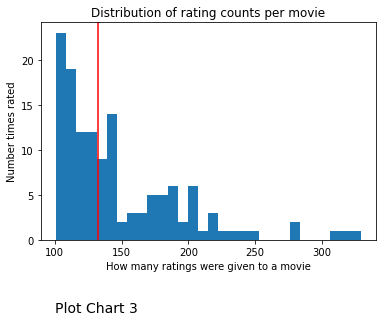

In [23]:
# Plot the (plain) distribution of rating counts by movie
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
rangeMovieRatings = np.arange(minNumRatingsPerMovie-1,maxNumRatingsPerMovie)
plt.hist(movieRatedCounts['Count_of_Ratings'], bins=30)
xlabel = 'How many ratings were given to a movie'
ylabel = 'Number times rated'
title = 'Distribution of rating counts per movie'
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.axvline(x=medianNumRatingsPerMovie, color='r')
plt.title(title)
plt.text(100, -8, "Plot Chart 3", fontsize=14)  # For in-text referencing
plt.show()

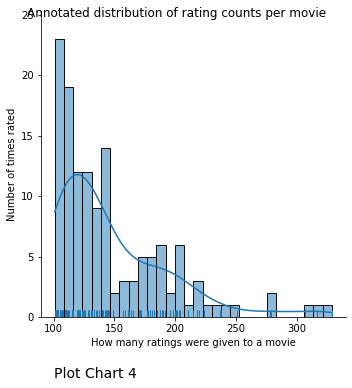

In [24]:
# Plot the annotated distribution of rating counts per movie
import seaborn as sns
g = sns.displot(data=movieRatedCounts['Count_of_Ratings'], bins=30, kde=True, rug=True)
xlabel = 'How many ratings were given to a movie'
ylabel = 'Number of times rated'
title = "Annotated distribution of rating counts per movie"
g.set_axis_labels(xlabel,ylabel)
g.fig.suptitle(title)
plt.text(100, -5, "Plot Chart 4", fontsize=14)  # For in-text referencing
plt.show()

In [25]:
# 2.2.c

The long tail is visible in the distribution of rating count per user (Plot Chart 1). This demonstrates the diversity of the movies reviewed by the users, which I discovered earlier by investigating the intersect.  The long tail in this case means a rich source of ratings for recommendation engines.  I interpret the distribution to mean a lot of users provided at least 150 reviews while some exceptional users reviewed in the order of 2500.  This will give a very useful dataset for the recommendation engines as it will have diversity.  I believe data like that should lend itself to item-item recommendations and item-user recommendations.

The distribution of rating counts per movie reveals a long tail (Plot Chart 3) in a similar but less obvious way. I interpret this to suggest that many of the films have rating counts in the 20-25 range. This is a healthy amount of reviews. There are a few movies that are outliers with over 300 ratings at the end of the tail.  In the case of these outliers, I believe we should be on guard for too much similarity. There are clearly popular films to watch, and we must ensure that the tradeoff between similarity and diversity is balanced, so that "over-rated" films aren't continually recommended with a bias toward films further down the tail. To mitigate the effect of such, maybe a penalty weighting system should be implemented.

Although they have a similar form, these two distributions tell different stories or viewpoints about the dataset and must be interpreted in light of what they reveal. In terms of user ratings, I see a long tail as positive, while in terms of movie ratings counts, I see a potentially negative to the long tail.

---

__Task 2.3__: Repeat Task 2.2 above, but deriving the average ratings rather than their counts.
The distribution of average ratings per user differs from the distribution of how many movies a user reviews.
You can also look at the distribution of average ratings per movie and the distribution of how many users rate each movie.
From your understanding of a rating system, comment on the similarities and differences.

In [26]:
## BEGIN YOUR ANSWER HERE

# 2.3

### Average Rating Mean by User

In [27]:
# Get the userRated groupby object - mean
userRatedMean = filter_Ratings_by_User_Df.groupby(['UserID'])[['Rating']].mean().sort_values('Rating', ascending=False)
userRatedMean.head()

,Rating
UserID,
171,4.634146
452,4.556931
43,4.552632
122,4.546233
52,4.476923


In [28]:
userRatedMean.describe()

,Rating
count,285.000000
mean,3.599428
std,0.449707
min,2.144330
25%,3.339394
50%,3.646667
75%,3.907162
max,4.634146


In [48]:
# Compute summaries of the userRatedMean object
medianUserRatedMean = userRatedMean.median()['Rating']
minUserRatedMean = userRatedMean.min()['Rating']
maxUserRatedMean = userRatedMean.max()['Rating']
numUniqueFilteredUsers = filter_Ratings_by_User_Df['UserID'].nunique() 
print("There are {} users who rated movies (above the min threshold), with the median and maximum rating of movies being {} and {} respectively".format(numUniqueFilteredUsers,medianUserRatedMean,maxUserRatedMean))

There are 285 users who rated movies (above the min threshold), with the median and maximum rating of movies being 3.6466666666666665 and 4.634146341463414 respectively


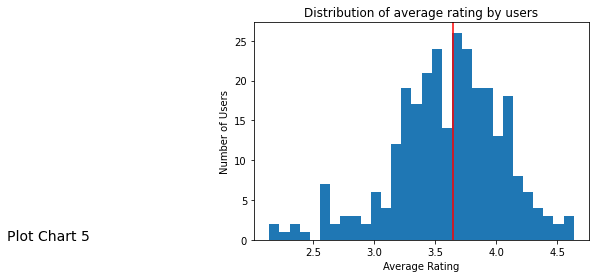

In [30]:
# Plot the (plain) distribution of average rating by users
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
rangeUserRatings = np.arange(minNumRatingsPerUser-1,maxUserRatedMean)
plt.hist(userRatedMean['Rating'], bins=30)
xlabel = 'Average Rating'
ylabel = 'Number of Users'
title = 'Distribution of average rating by users'
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.axvline(x=medianUserRatedMean, color='r')
plt.text(0, 0, "Plot Chart 5", fontsize=14)  # For in-text referencing
plt.title(title)
plt.show()

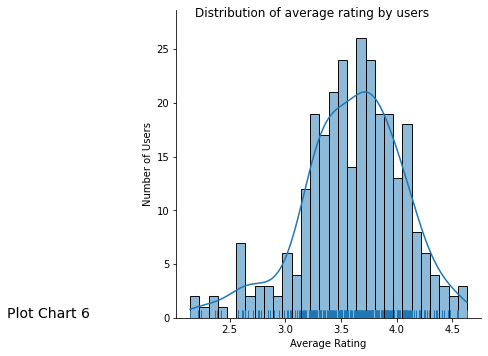

In [31]:
# Plot the annotated distribution of rating counts per user
import seaborn as sns
g = sns.displot(data=userRatedMean['Rating'], bins=30, kde=True, rug=True)
xlabel = 'Average Rating'
ylabel = 'Number of Users'
title = 'Distribution of average rating by users'
g.fig.suptitle(title)
g.set_axis_labels(xlabel,ylabel)
plt.text(0.5, 0, "Plot Chart 6", fontsize=14)  # For in-text referencing
plt.show()

### Average Rating Mean by Movie

In [32]:
# Get the movieRated groupby object - mean
movieRatedMean = filter_Ratings_by_Movie_Df.groupby(['MovieID'])[['Rating']].mean().sort_values('Rating', ascending=False)
movieRatedMean.head()

,Rating
MovieID,
318,4.429022
858,4.289062
2959,4.272936
1221,4.259690
48516,4.252336


In [33]:
movieRatedMean.describe()

,Rating
count,134.000000
mean,3.820059
std,0.342938
min,2.913043
25%,3.566176
50%,3.883902
75%,4.094172
max,4.429022


In [34]:
# Compute summaries of the movieRatedMean object
medianMovieRatedMean = movieRatedMean.median()['Rating']
minMovieRatedMean = movieRatedMean.min()['Rating']
maxMovieRatedMean = movieRatedMean.max()['Rating']
numUniqueFilteredMovies = filter_Ratings_by_Movie_Df['MovieID'].nunique()  
print("There are {} movies rated by users (above the min threshold), with the median and maximum rating per movie being {} and {} respectively".format(numUniqueFilteredMovies,medianMovieRatedMean,maxMovieRatedMean))

There are 134 movies rated by users (above the min threshold), with the median and maximum rating per movie being 3.883902164217642 and 4.429022082018927 respectively


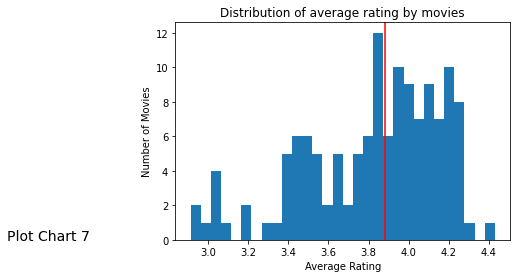

In [35]:
# Plot the (plain) distribution of average rating by movies
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
rangeMovieRatings = np.arange(minMovieRatedMean-1,maxMovieRatedMean)
plt.hist(movieRatedMean['Rating'], bins=30)
xlabel = 'Average Rating'
ylabel = 'Number of Movies'
title = 'Distribution of average rating by movies'
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.axvline(x=medianMovieRatedMean, color='r')
plt.title(title)
plt.text(2, 0, "Plot Chart 7", fontsize=14)  # For in-text referencing
plt.show()

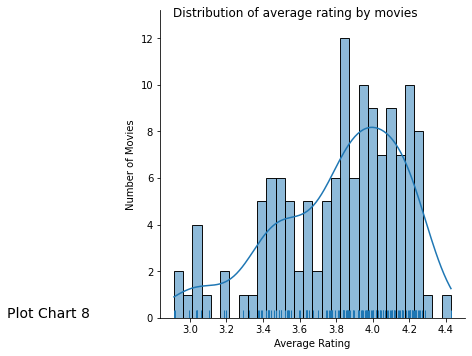

In [36]:
# Plot the annotated distribution of average rating per movie
import seaborn as sns
g = sns.displot(data=movieRatedMean['Rating'], bins=30, kde=True, rug=True)
xlabel = 'Average Rating'
ylabel = 'Number of Movies'
title = 'Distribution of average rating by movies'
g.fig.suptitle(title)
g.set_axis_labels(xlabel,ylabel)
plt.text(2, 0, "Plot Chart 8", fontsize=14)  # For in-text referencing
plt.show()

#### Look at the distribution of average rating across the all ratings (unfiltered)

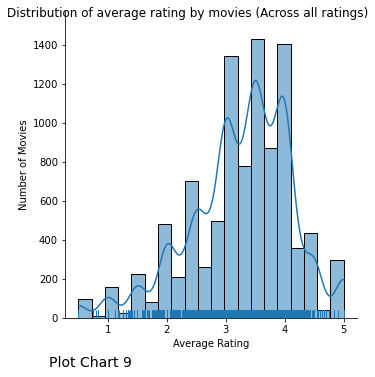

In [37]:
allRatings = ratingsDf.groupby('MovieID')[["Rating"]].mean()

# Plot the annotated distribution of average ratings per movie
import seaborn as sns
g = sns.displot(data=allRatings['Rating'], bins=20, kde=True, rug=True)
xlabel = 'Average Rating'
ylabel = 'Number of Movies'
title = 'Distribution of average rating by movies (Across all ratings)'
g.fig.suptitle(title)
g.set_axis_labels(xlabel,ylabel)
plt.text(0, -250, "Plot Chart 9", fontsize=14)  # For in-text referencing
plt.show()

#### Number of Ratings vs Average Rating

Text(0.5, -0.4, 'Plot Chart 10')

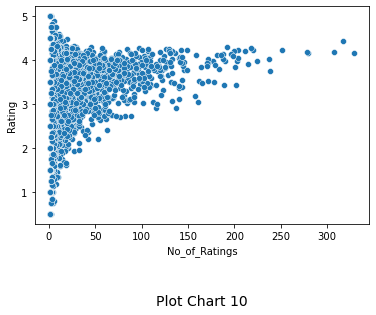

In [52]:
meanRatings = ratingsDf.groupby('MovieID')[["Rating"]].mean()

countRatings = ratingsDf.groupby('MovieID')[["Rating"]].count()
vsRatings = countRatings.merge(meanRatings, left_index=True, right_index=True)
vsRatings.columns = ["No_of_Ratings", "Rating"]

sns.scatterplot(data=vsRatings, x="No_of_Ratings", y="Rating").set_title('Plot Chart 10', y=-0.4, fontsize = 14)

#### Total Count for Each Rating

Text(0.5, -0.4, 'Plot Chart 11')

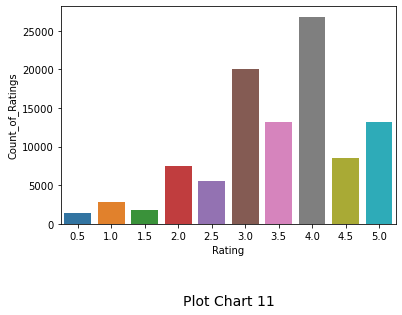

In [39]:
countRatings2 = ratingsDf.groupby('Rating')[["Rating"]].count()
countRatings2.columns = ['Count_of_Ratings']
countRatings2['Rating'] = countRatings2.index
sns.barplot(data=countRatings2, x="Rating", y="Count_of_Ratings").set_title('Plot Chart 11', y=-0.4, fontsize = 14)

#countRatings2

**Comments**

The distribution of Average User Rating Mean (Plot Chart 5 & 6) resembles a regular bell-curve distribution skewed to the left. According to my interpretation, the range along the x-axis for these filtered movies is greater than 2.5.  It makes sense that a successful film will receive at least a 3 on a scale of 1 to 5, with 1 being an awful film and 5 being a brilliant film. These films have been filtered based on the amount of ratings and, as a result, the number of times they have been reviewed, showing their success.

However, I see a similar left-skewed bell-shaped distribution when I look at the distribution of average movie scores for all ratings, unfiltered (Plot Chart 9). The average ranking appears to be between 3 and 4. However, on a scale of only whole numbers, this means that users usually give a score a 3 or a 4. Can I explain this phenomenon by considering a movie watcher's behaviour?

**Rating System and User Behaviour**

A moviegoer watches a film. It is impossible to give a film a 2.5 rating*. As a result, the user is more likely to give a film a 3 (acceptable) or a 4 (good) rating.  This can clearly be seen in the scatterplot showing the number of ratings vs average rating (Plot Chart 10). They are unlikely to give a film a 5 (outstanding) unless it is really one of their all-time favorites. A truly awful (1) film they would not have wasted time or money to watch in the first place, if it were a bad (2) film they would not have bothered to rate or finish watching it.  Although a loose theory of user behaviour, in general, I believe the rating system is flawed, which may explain the distorted distribution.  In addition, since these are voluntary reviews, subjectivity and bias creeps in. Perhaps the distribution would be different if reviews were done by paid movie-watching professionals, since they would have to watch and rate both good and poor films.

Other details about sentiment may be gleaned from sentiment analysis of tags or the amount of times a user watches a movie. If a user watches a movie more than once, it may mean that they enjoy it, but their rating could be decreasing every time the user rates it because watching a movie so many times may make you tired of it.  These particulars may be used to back up scores.

The average rating per movie distribution is also skewed to the left and resembles a bell curve (Plot Chart 7 & 8). It supports my hypothesis that users will assign a 3 or 4 rating to films, as described in the summary of their behavior.

***Note:** It is possible to give ratings in increments of 0.5 ratings, as shown by the bar chart analysis counting all ratings (Plot Chart 11). However, it's possible that not all of the platforms from which they collect data support this or support has changed over time. Dips in the distribution of average rating by movie can be seen on the bar chart when looking at the total counts of ratings in the unfiltered dataset (Plot Chart 11), as well as on the KDE line when looking at the distribution of average rating by movie (Plot Chart 9) at the .5 increment values.  This is yet another flaw in this rating system.

In [40]:
## END YOUR ANSWER HERE

---

__Task 2.4__: Load the (filtered) movies ratings data from the dataframe we have been exploring into the preferred 3-column format used by the `scikit-suprise` package. Now benchmark the performance (in terms of RMS error, time to fit, and time to generate predictions for test data) of the `SVD()`, `SlopeOne()`, `NMF()`, `KNNBasic()` recommendation algorithms. Discuss the strengths and weaknesses of each algorithm, based on its benchmarked results.


In [41]:
# 1. `scikit-surprise` provides a `cross_validate` function that can be used to estimate the test error in the test data, using the requested error metric.
# 2. When collecting the benchmark data, it is convenient to loop over the algorithms and to add the results for each algorithm as a row to the benchmark dataframe.
# 3. The following python code can be used to add `results` as a row to a `benchmark` dataframe.
# You are advised to plot the results, and to pay attention to fit, test and overall times and how they vary between the algorithms. Comment on what you find.

In [42]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import KNNBasic, NMF, SlopeOne, SVD

reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(filter_Ratings_by_Movie_Df[['UserID', 'MovieID', 'Rating']], reader)

In [43]:
benchmark = pd.DataFrame()
algorithms = [KNNBasic(), SVD(), SlopeOne(), NMF()]

# Iterate over all algorithms
for algorithm in algorithms:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark = benchmark.append(tmp, ignore_index=True)
    
benchmark.set_index('Algorithm').sort_values('test_rmse')
benchmark['comp_time'] = benchmark['fit_time'] + benchmark['test_time']

print(benchmark)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
  Algorithm  fit_time  test_mae  test_rmse  test_time  comp_time
0  KNNBasic  0.085569  0.646524   0.854813   1.741810   1.827379
1       SVD  1.187043  0.628602   0.825025   0.080692   1.267735
2  SlopeOne  0.044778  0.621784   0.822816   0.319878   0.364657
3       NMF  2.224494  0.655563   0.860738   0.192238   2.416732


In [44]:
## BEGIN YOUR ANSWER HERE

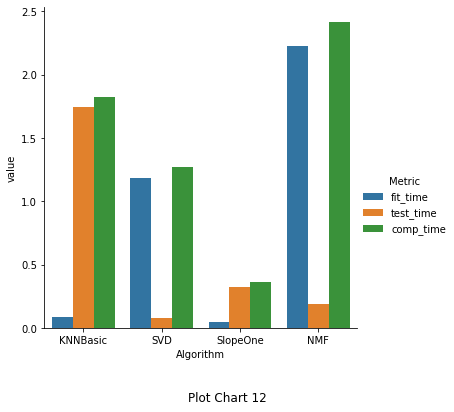

In [45]:
# Use melt to "massage" the data into something more useful for creating a single plot

benchmark2 = pd.melt(benchmark, id_vars =['Algorithm'], value_vars =['fit_time', 'test_time', 'comp_time'], var_name='Metric')

g = sns.catplot(x="Algorithm", y="value", kind="bar", data=benchmark2, hue="Metric")
g.fig.suptitle("Plot Chart 12",y=-0.1)
plt.show()

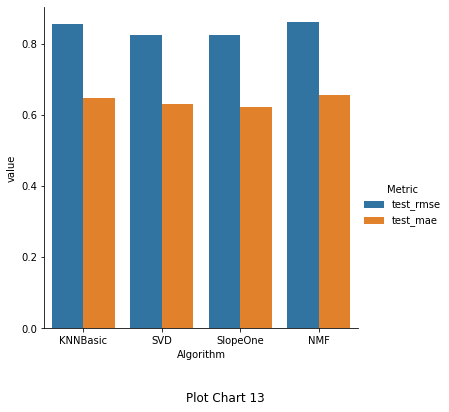

In [46]:
benchmark3 = pd.melt(benchmark, id_vars =['Algorithm'], value_vars =['test_rmse', 'test_mae'], var_name='Metric')

g = sns.catplot(x="Algorithm", y="value", kind="bar", data=benchmark3, hue="Metric")
g.fig.suptitle("Plot Chart 13",y=-0.1)
plt.show()

**Comments**

#### Root Mean Squared Error (RMSE) 

$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}} $$

The root mean square error (RMSE) is the residuals' standard deviation (prediction errors). Residuals are a measure of how far the data points are from the regression line, RMSE is a measure of how spread out these residuals are. In other words, it indicates how tightly the data is clustered along the line of best fit.  Lower RMSE values suggest a better match.

In terms of this metric the algorithms perform from best to worst in this order:

1. SlopeOne
2. SVD
3. KNNBasic
4. NMF

The difference between the algorithms RMSE readings is very marginal.

#### Mean Absolute Error (MAE)

$$ MAE = \frac{1}{n}\sum_{t=1}^{n}|e_t| $$

A measure of errors between paired observations describing the same phenomenon is called mean absolute error (MAE). In time series analysis, the mean absolute error is a common measure of forecast error, which is often confused with the more conventional concept of mean absolute deviation.

In terms of this metric the algorithms perform from best to worst in this order:

1. SlopeOne
2. SVD
3. KNNBasic
4. NMF

The difference between the algorithms MAE measurements is once again very small. The most intriguing aspect is that we get the same ordered list of algorithms regardless of the metric used to calculate the most accurate algorithm.

#### Time
KNN is the second fastest algorithm in terms of fit time, however, the algorithm takes the longest test time.  The combination of the two leads to KNN having a poor performance in terms of time.  The test time for KNN severely hampers the performance of this algorithm.  SVD, on the other hand, takes the third longest to fit but is very quick to test. NMF is similar to SVD in that it takes a long time to test but is quick to fit.  In contrast to the other algorithms, SlopeOne is lightning fast to both fit and test and has the best overall speed.

Let's order the algorithms in terms of their overall time:

1. SlopeOne
2. SVD
3. KNNBasic
4. NMF

#### Winners and Losers
* SlopeOne is both quick and accurate. And is outright the winner.
* NMF is the least accurate and slowest. And is an outright loser.

When comparing SVD and KNNBasic we can say:
* SVD is both more accurate and faster than KNNBasic.

**Note**: I repeated these tests many times while preparing the assignment. The outcomes aren't always predictable. SlopeOne, however, is always victorious. The outcomes of the other algorithms vary.  SVD always seems to be in second place.  While KNNBasic and NMF often have varying results. To be honest, this unpredictability makes me uncomfortable and I wonder if it is a sign of instability in the application of those alogrithms to this dataset.

Keep in mind that SlopeOne was a good fit for this anonymized dataset since it includes a lot of details about the items. In the same discussion, NMF was mentioned as an emerging class of algorithms with potential privacy benefits. As a result, we must understand not only time or precision, but also the advantages and disadvantages of algorithms in light of the dataset, context, policy or regulation.

Given this analysis, I would recommend SlopeOne and posssibly SVD for immediate use as a recommendation engine, but NMF could be considered with more in depth study for its abilities to protect privacy which is obviously a concern for MovieLens.

In [47]:
## END YOUR ANSWER HERE